## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Apr 23 17:20:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install Grounding DINO 🦕

In [ ]:
%cd {HOME}
!git clone https://github.com/IDEA-Research/GroundingDINO.git
%cd {HOME}/GroundingDINO
!pip install -q -e .
!pip install -q roboflow

/content
Cloning into 'GroundingDINO'...
remote: Enumerating objects: 433, done.
remote: Counting objects: 100% (202/202), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 433 (delta 152), reused 132 (delta 128), pack-reused 231
Receiving objects: 100% (433/433), 12.86 MiB | 26.60 MiB/s, done.
Resolving deltas: 100% (223/223), done.
/content/GroundingDINO
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.1/97.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.1/74.1 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━

In [ ]:
import os

CONFIG_PATH = os.path.join(HOME, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

/content/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True


## Download Grounding DINO Weights 🏋️

In [ ]:
%cd {HOME}
!mkdir {HOME}/weights
%cd {HOME}/weights

!wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth

/content
/content/weights


In [ ]:
import os

WEIGHTS_NAME = "groundingdino_swint_ogc.pth"
WEIGHTS_PATH = os.path.join(HOME, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/content/weights/groundingdino_swint_ogc.pth ; exist: True


## Download Example Data

In [ ]:
%cd {HOME}
!mkdir {HOME}/data
%cd {HOME}/data

!wget -q https://media.roboflow.com/notebooks/examples/dog.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-2.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-3.jpeg
!wget -q https://media.roboflow.com/notebooks/examples/dog-4.jpeg

/content
/content/data


## Load Grounding DINO Model

In [ ]:
%cd {HOME}/GroundingDINO

from groundingdino.util.inference import load_model, load_image, predict, annotate

model = load_model(CONFIG_PATH, WEIGHTS_PATH)

/content/GroundingDINO


final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# path_to_dataset = "/content/drive/MyDrive/545 Project/Datasets/RefCOCO_3ds_3k_images"
path_to_dataset = "/content/drive/MyDrive/"
path_to_dataset_test_images = path_to_dataset + "/test/images/"
path_to_dataset_test_instances = path_to_dataset + "/test/instances.json"
path_to_dataset_test_refs = path_to_dataset + "/test/refs.json"

import json
instances_file = open(path_to_dataset_test_instances)
instnaces_dict = json.load(instances_file)
refs_file = open(path_to_dataset_test_refs)
refs_list = json.load(refs_file)

# find mapping for image_name to annotation
image_to_annotations_map = {}
for anno_id, anno in enumerate(instnaces_dict["annotations"]):
 image_id = instnaces_dict["annotations"][anno_id]["image_id"]
 if image_id in list(image_to_annotations_map.keys()):
  image_to_annotations_map[image_id].append(anno_id)
 else:
  image_to_annotations_map[image_id] = [anno_id]

print(image_to_annotations_map)
print(len(instnaces_dict["annotations"]))


# find mapping for category it to category type
category_id_to_name_map = {}
for category in instnaces_dict["categories"]:
  category_id_to_name_map[category["id"]] = category["name"]

# create ann_id to refs index
ann_id_to_refs_index = {}
for ref_index, ref in enumerate(refs_list):
  ann_id_to_refs_index[ref['ann_id']] = ref_index

print(ann_id_to_refs_index)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/test/test/instances.json'

In [ ]:
import random
anno_id = 243
anno_sentences = refs_list[ann_id_to_refs_index[anno_id]]['sentences']
num_sentences = len(anno_sentences)
selected_sentence = anno_sentences[random.randint(0,num_sentences-1)]['sent']
print(selected_sentence)

cell phone


In [ ]:
# VISUALIZE ALL ANNOTATIONS FOR ALL IMAGES
import torch
import copy
from tqdm import tqdm

img_h, img_w = [instnaces_dict["images"][0]["height"],instnaces_dict["images"][0]["width"]]
images_in_dataset = list(image_to_annotations_map.keys())

# loop through all images in specified dataset
for image_id in tqdm(images_in_dataset):

  num_annotations = len(image_to_annotations_map[image_id]) # number of annotations for image

  # initialize bounding boxes and phrases
  boxes = torch.zeros((num_annotations,4))
  phrases = []

  # loop through all annotations for the image
  for bbox_index, anno_id in enumerate(image_to_annotations_map[image_id]):

    # convert pixel bounding box (xmin, ymin, w, h) to percentage bounding box (xcenter,ycenter,w,h)
    bbox_pix = instnaces_dict["annotations"][anno_id]["bbox"]
    bbox_pix_shifted = copy.deepcopy(bbox_pix)
    bbox_pix_shifted[0] += bbox_pix_shifted[2]/2
    bbox_pix_shifted[1] += bbox_pix_shifted[3]/2
    bbox_per = torch.tensor([bbox_pix_shifted[0]/img_w, bbox_pix_shifted[1]/img_h, bbox_pix_shifted[2]/img_w, bbox_pix_shifted[3]/img_h])
    boxes[bbox_index,:] = bbox_per


    phrases.append(str(instnaces_dict["annotations"][anno_id]["category_id"])) # for visualization

  logits = torch.zeros(num_annotations) # for visualization


100%|██████████| 325/325 [00:00<00:00, 2004.26it/s]


SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


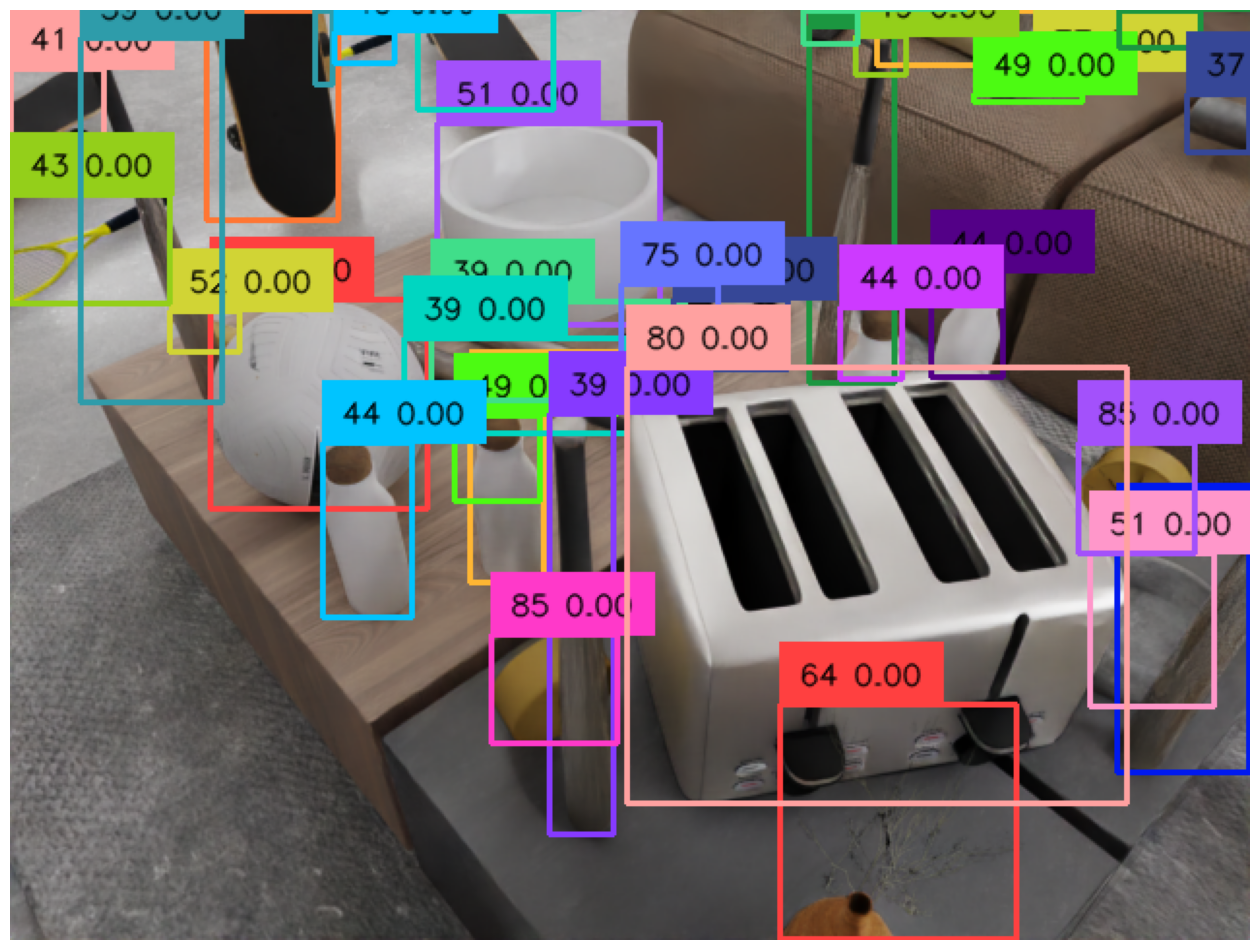

In [ ]:
# annotate image with ground truth data

IMAGE_NAME = str(image_id).zfill(6) + ".png"
IMAGE_PATH = path_to_dataset_test_images + IMAGE_NAME

TEXT_PROMPT = "baseball bat"
BOX_TRESHOLD = 0.20 # 35
TEXT_TRESHOLD = 0.20  #25

image_source, image = load_image(IMAGE_PATH)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
# EVALUATE
import torch
import copy
from tqdm import tqdm
import os
import supervision as sv


BOX_TRESHOLD = 0.10 # 35
TEXT_TRESHOLD = 0.10  #25

img_h, img_w = [instnaces_dict["images"][0]["height"],instnaces_dict["images"][0]["width"]]
images_in_dataset = list(image_to_annotations_map.keys())

# loop through all images in specified dataset
for image_id in tqdm(images_in_dataset[0:1]):

  IMAGE_NAME = str(image_id).zfill(6) + ".png"
  IMAGE_PATH = path_to_dataset_test_images + IMAGE_NAME

  num_annotations = len(image_to_annotations_map[image_id]) # number of annotations for image

  # loop through all ground truth bounding boxes for the image
  for bbox_index, anno_id in enumerate(image_to_annotations_map[image_id][0:9]):

    # find the ground truth bounding box
    # convert pixel bounding box (xmin, ymin, w, h) to percentage bounding box (xcenter,ycenter,w,h)
    bbox_pix = instnaces_dict["annotations"][anno_id]["bbox"]
    bbox_pix_shifted = copy.deepcopy(bbox_pix)
    bbox_pix_shifted[0] += bbox_pix_shifted[2]/2
    bbox_pix_shifted[1] += bbox_pix_shifted[3]/2
    box_gt = torch.tensor([bbox_pix_shifted[0]/img_w, bbox_pix_shifted[1]/img_h, bbox_pix_shifted[2]/img_w, bbox_pix_shifted[3]/img_h])

    # choose randome annotation phrase
    anno_sentences = refs_list[anno_id]['sentences']
    num_sentences = len(anno_sentences)
    TEXT_PROMPT = anno_sentences[random.randint(0,num_sentences-1)]['sent']

    # find the predicted bounding boxes
    image_source, image = load_image(IMAGE_PATH)
    boxes, logits, phrases = predict(
        model=model,
        image=image,
        caption=TEXT_PROMPT,
        box_threshold=BOX_TRESHOLD,
        text_threshold=TEXT_TRESHOLD
    )

    boxes = torch.vstack((boxes,box_gt))
    new = torch.tensor([-1.0])
    logits = torch.cat((logits,new))
    phrases.append("GT")

    print(boxes)
    print(logits)

    annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
    %matplotlib inline
    sv.plot_image(annotated_frame, (16, 16))

Output hidden; open in https://colab.research.google.com to view.

## Grounding DINO Demo

tensor([[0.3161, 0.5309, 0.0500, 0.2600],
        [0.5100, 0.4627, 0.0197, 0.2509],
        [0.6119, 0.4729, 0.0329, 0.2528],
        [0.4975, 0.6442, 0.0395, 0.1127],
        [0.5596, 0.5009, 0.0777, 0.0275],
        [0.1050, 0.5770, 0.0734, 0.2072],
        [0.6109, 0.2517, 0.0258, 0.1984]])
torch.Size([7])
7


SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


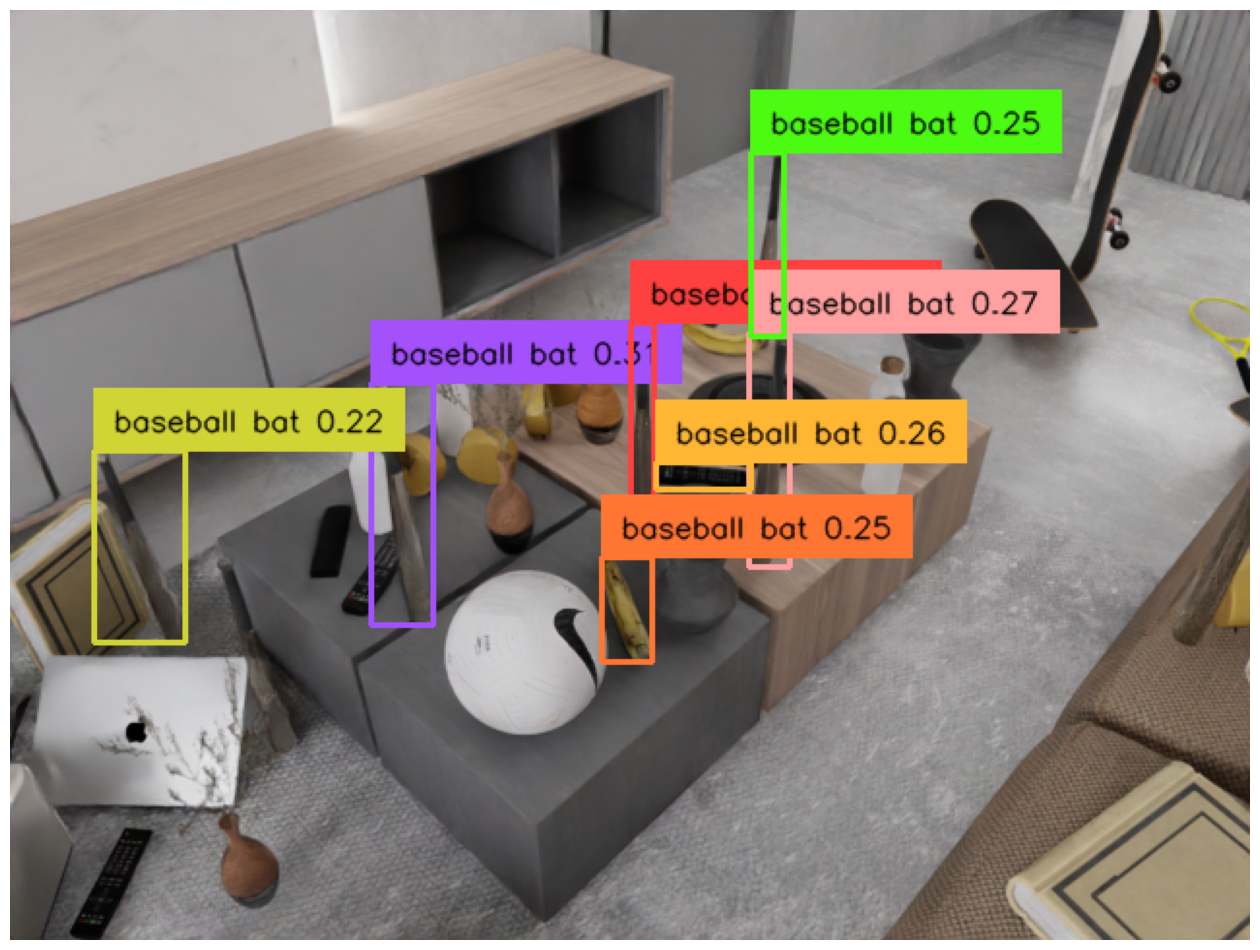

In [ ]:
# output predictions

import os
import supervision as sv

images = ["000006.png"]

IMAGE_NAME = path_to_dataset_test_images + "000006.png"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "baseball bat"
BOX_TRESHOLD = 0.20 # 35
TEXT_TRESHOLD = 0.20  #25

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)


print("="*30)
print(boxes)
print(logits.shape)
print(len(phrases))
print("="*30)
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

In [ ]:
# compute evaluation metic



SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


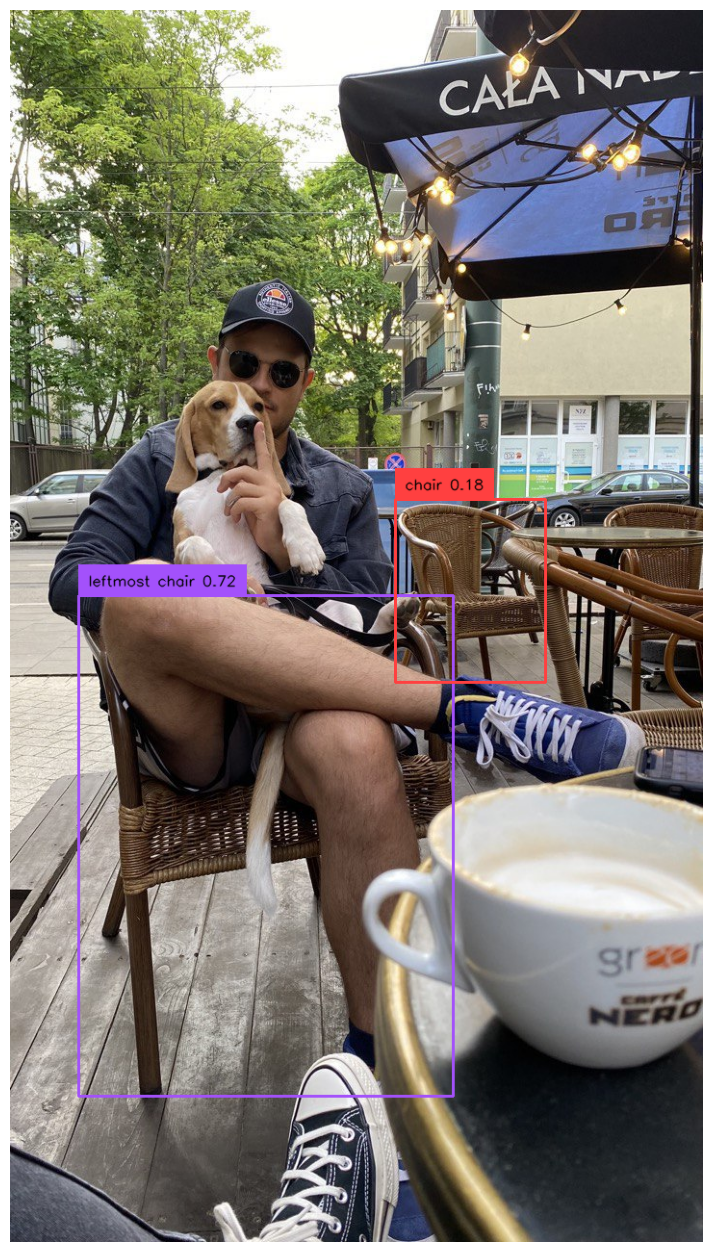

In [ ]:
import os
import supervision as sv

IMAGE_NAME = "dog-3.jpeg"
IMAGE_PATH = os.path.join(HOME, "data", IMAGE_NAME)

TEXT_PROMPT = "leftmost chair"
BOX_TRESHOLD = 0.15   # 15
TEXT_TRESHOLD = 0.15  # 15

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

%matplotlib inline
sv.plot_image(annotated_frame, (16, 16))

## Grounding DINO with Roboflow Dataset